# TCA Calculations

### Import libraries

In [31]:
import numpy as np
import math
from matplotlib.pyplot import *

### Define Constants

In [ ]:
# Constants
g_earth =  32.1740;   # units - ft/seconds^2
R = 1545.348963;      # universal gas constant; units - ft*lbf/R*lb-mol
atm_to_psi = 14.6959; # units - psi/atm
Factor_of_Safety = 1.4;

In [33]:
#Thrust Chamber Design Parameters
# Using P_exit = 1, and plots from
# http://www.braeunig.us/space/comb-OM.htm P_Chamber, T_Chamber, y, Gas_Molecular_Weight can be extracted
#     after choosing the mixture ratio.
Characteristic_Length = 40    # units - inches; interpolated use table 4-1 from Huzel+Huang Modern Engineering for Design of LRES 
Thrust = 1000                 # units - pounds
T_Chamber_C = 3089            # Chamber temperature; units - Celcius
P_Chamber = 1000                # Chamber pressure; units - atm
P_Exit = 6.62                 # Exit pressure - sea level; units - atm
P_Ambient = 13.64             # Ambient pressure - sea level; units - atm
Mixture_Ratio = 2.77          # O/F mass ratio; unitless
Gas_Molecular_Weight = 20.158 # units - amu
y = 1.2161                    # Ratio of Specific Heats - unitless
Working_Stress = 80000        # units - psi; yield stress of inconel walling


In [34]:
## Adiabatic Flame Temperature - Chamber Temperature; CONVERSIONS
T_Chamber_K = T_Chamber_C + 273.15; # units - Kelvin
T_Chamber_F = T_Chamber_C * 1.8 + 32; # units - Fahrenheit
T_Chamber_R = T_Chamber_F + 459.67; # units - Rankine


In [35]:
def pressureAtAltitude(h):
#    Pb, Tb, Lb, hb
    Rb = 89494.596
    g = 32.1705
    M = 28.9644
    if h < 36089:
        Pb = 101325.00*0.000145038
        Tb = 288.15
        Lb = -0.0019812
        hb = 0
    elif h < 65617:
        Pb = 22632.10*0.000145038
        Tb = 216.65
        hb = 36089
        return Pb*math.exp(-g*M*(h - hb)/(Rb*Tb))
    elif h < 104987:
        Pb = 5474.89*0.000145038
        Tb = 216.65
        Lb = 0.0003048
        hb = 65617
    elif h < 154199:
        Pb = 868.02*0.000145038
        Tb = 216.65
        Lb = 0.00085344
        hb = 104987
    elif h < 167323:
        Pb = 110.91*0.000145038
        Tb = 270.65
        hb = 154199
        return Pb*math.exp(-g*M*(h - hb)/(Rb*Tb))
    elif h < 232940:
        Pb = 66.94*0.000145038
        Tb = 270.65
        Lb = -0.00085344
        hb = 167323
    else:
        Pb = 3.96*0.000145038
        Tb = 214.65
        Lb = -0.0006096
        hb = 232940
    return Pb*(Tb/(Tb+Lb*(h - hb)))**(g*M/(Rb*Lb))
        

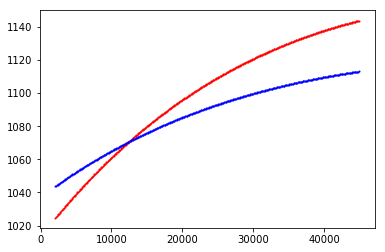

In [36]:
# Assuming constant burn, Below is Isp vs Altitude
figure(1)
subplot(111)
for h in range(2100, 45000, 100):
    P_Ambient = pressureAtAltitude(h)
    Expansion_Ratio = (2/(y+1))**(1/(y-1)) * (P_Chamber/P_Exit)**(1/y) / ( (y+1)/(y-1) * (1 - (P_Exit/P_Chamber)**(1-1/y)) )**.5 # unitless
    c_star = (g_earth*y*R*T_Chamber_R/Gas_Molecular_Weight)**(.5)/(y*((2/(y+1))**((y+1)/(y-1)))**.5) # ft/second
    lamda = .985
    Cf = lamda*( (2*y*y)/(y-1) * (2/(y+1))**((y+1)/(y-1)) * (1 - (P_Exit/P_Chamber)**((y-1)/y)) )**(1/2) + Expansion_Ratio*(P_Exit-P_Ambient)/P_Chamber
    Isp = c_star*Cf/g_earth # units - seconds
    Massflow_Total = Thrust/Isp                        # units - lbs/s
    scatter(h, Isp*3.6, color="red",s=1)
P_Exit = pressureAtAltitude(2100)
for h in range(2100, 45000, 100):
    P_Ambient = pressureAtAltitude(h)
    Expansion_Ratio = (2/(y+1))**(1/(y-1)) * (P_Chamber/P_Exit)**(1/y) / ( (y+1)/(y-1) * (1 - (P_Exit/P_Chamber)**(1-1/y)) )**.5 # unitless
    c_star = (g_earth*y*R*T_Chamber_R/Gas_Molecular_Weight)**(.5)/(y*((2/(y+1))**((y+1)/(y-1)))**.5) # ft/second
    lamda = .985
    Cf = lamda*( (2*y*y)/(y-1) * (2/(y+1))**((y+1)/(y-1)) * (1 - (P_Exit/P_Chamber)**((y-1)/y)) )**(1/2) + Expansion_Ratio*(P_Exit-P_Ambient)/P_Chamber
    Isp = c_star*Cf/g_earth # units - seconds
    Massflow_Total = Thrust/Isp                        # units - lbs/s
    scatter(h, Isp*3.6,color="blue",s=1)
show()
